In [3]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

In [5]:
import pandas as pd
df = pd.read_csv("/IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print(df.columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Missing Values:
review       0
sentiment    0
dtype: int64
Index(['review', 'sentiment'], dtype='object')


In [7]:

df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


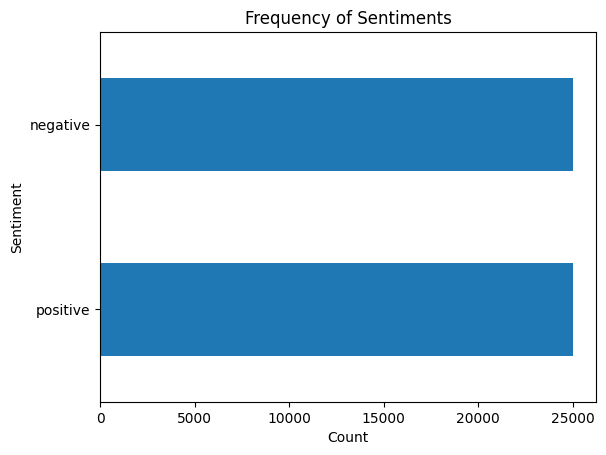

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Sentiments")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.show()

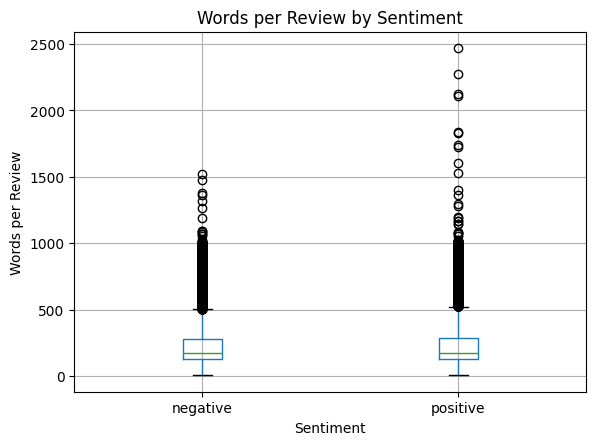

In [9]:
df['Words per Review'] = df['review'].str.split().apply(len)
df.boxplot("Words per Review", by="sentiment")
plt.title("Words per Review by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Words per Review")
plt.show()

In [10]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"  # Using DistilBERT model instead of BERT
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "The movie was fantastic! The acting and storyline were exceptional."
encoded_text = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': tensor([[  101,  1996,  3185,  2001, 10392,   999,  1996,  3772,  1998,  9994,
          2020, 11813,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [11]:
print(len(tokenizer), tokenizer.vocab_size, tokenizer.model_max_length)

30522 30522 512


In [12]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])

train.shape, test.shape, validation.shape

((35000, 3), (10000, 3), (5000, 3))

In [13]:
!pip install datasets

In [14]:
from datasets import Dataset, DatasetDict

# Convert pandas DataFrames to Hugging Face datasets
dataset = DatasetDict({
    "train": Dataset.from_pandas(train[['review', 'sentiment']], preserve_index=False),
    "test": Dataset.from_pandas(test[['review', 'sentiment']], preserve_index=False),
    "validation": Dataset.from_pandas(validation[['review', 'sentiment']], preserve_index=False)
})

In [15]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment'],
        num_rows: 5000
    })
})

In [16]:
dataset['train'][0]


{'review': "Joseph Conrad's timeless novel, Heart of Darkness, was depicted in the 1994 movie. I have read Conrad's novel, and I must say, even though I prefer the novel itself, the movie was a great depiction. The set and costume designs brought Conrad's novel to life on the screen as we followed Marlow's journey. The acting also brought the characters to life through the mannerisms, voices, and personalities. If you have read the novel, I recommend that you also view this movie. If you have not read the novel, however, the movie may be harder to follow. Conrad's Heart of Darkness is too full of action, emotion, and information to be made into a movie that is a little over an hour and a half long. Therefore, if you have not read the novel, the plot in the movie may seem too cluttered to follow. Overall I gave this movie a seven out of ten. The basic plot of the novel was brought forth to the screen with great sets, costumes, and acting. Nothing can replace Joseph Conrad's original wor

In [17]:
def tokenize(batch):

    temp = tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True)
    return temp
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 3312, 10931, 1005, 1055, 27768, 3117, 1010, 2540, 1997, 4768, 1010, 2001, 8212, 1999, 1996, 2807, 3185, 1012, 1045, 2031, 3191, 10931, 1005, 1055, 3117, 1010, 1998, 1045, 2442, 2360, 1010, 2130, 2295, 1045, 9544, 1996, 3117, 2993, 1010, 1996, 3185, 2001, 1037, 2307, 15921, 1012, 1996, 2275, 1998, 9427, 5617, 2716, 10931, 1005, 1055, 3117, 2000, 2166, 2006, 1996, 3898, 2004, 2057, 2628, 9388, 8261, 1005, 1055, 4990, 1012, 1996, 3772, 2036, 2716, 1996, 3494, 2000, 2166, 2083, 1996, 5450, 22556, 1010, 5755, 1010, 1998, 12857, 1012, 2065, 2017, 2031, 3191, 1996, 3117, 1010, 1045, 16755, 2008, 2017, 2036, 3193, 2023, 3185, 1012, 2065, 2017, 2031, 2025, 3191, 1996, 3117, 1010, 2174, 1010, 1996, 3185, 2089, 2022, 6211, 2000, 3582, 1012, 10931, 1005, 1055, 2540, 1997, 4768, 2003, 2205, 2440, 1997, 2895, 1010, 7603, 1010, 1998, 2592, 2000, 2022, 2081, 2046, 1037, 3185, 2008, 2003, 1037, 2210, 2058, 2019, 3178, 1998, 1037, 2431, 2146, 1012, 3568, 1010, 2065, 2017, 2031, 2025

In [18]:
emotion_encoded = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [19]:
label2id = {'positive': 1, 'negative': 0}
id2label = {v: k for k, v in label2id.items()}

label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

In [20]:
from transformers import AutoModelForSequenceClassification
import torch

model_ckpt = "distilbert-base-uncased"

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [22]:
model.config
model_two = "distilbert-base-uncased"
print(model.config)

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.48.1",
  "vocab_size": 30522
}



In [23]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_ckpt = "distilbert-base-uncased"

config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
device

device(type='cuda')

In [25]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [28]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "distilbert_base_training_dir"

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_dir='./logs',
    logging_steps=500,
    disable_tqdm=False,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [27]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.1 MB/s eta 0:00:00


In [26]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": acc, "f1": f1}

In [29]:
import torch
from transformers import TrainingArguments, Trainer, DistilBertForSequenceClassification, DistilBertTokenizer
from datasets import load_dataset
dataset = load_dataset('imdb')

# Load the tokenizer and mode
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding="max_length",  # Add padding to max length
        truncation=True,       # Truncate inputs exceeding max length
        max_length=512         # Explicitly set max length to 512
    )

# Apply the tokenizer to the datasets
encoded_dataset = dataset.map(tokenize_function, batched=True)

# Convert dataset to PyTorch format
encoded_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Ensure the model is moved to GPU if available
device = torch.device("cuda")  # Force GPU usage
model.to(device)  # Move the model to GPU

# Adjusting training arguments for GPU
training_args = TrainingArguments(
    output_dir='./results',               # Path to save results
    num_train_epochs=3,                   # Number of training epochs
    per_device_train_batch_size=16,       # Batch size per GPU device
    per_device_eval_batch_size=16,        # Batch size for evaluation
    gradient_accumulation_steps=4,        # Accumulate gradients over 4 steps (simulates larger batch size)
    warmup_steps=500,                     # Warmup steps for learning rate scheduler
    weight_decay=0.01,                    # Weight decay for optimization
    logging_dir='./logs',                 # Directory for logs
    logging_steps=10,                     # Log every X steps
    evaluation_strategy="epoch",          # Evaluate at the end of every epoch
    save_strategy="epoch",                # Save model at the end of every epoch
    fp16=torch.cuda.is_available(),       # Enable mixed precision training if GPU is available
    dataloader_num_workers=4,             # Use multiple workers for data loading
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                          # The model to train
    args=training_args,                   # Training arguments
    train_dataset=encoded_dataset['train'],  # Training dataset
    eval_dataset=encoded_dataset['test'],    # Evaluation dataset
    tokenizer=tokenizer,                  # Tokenizer
)

# Start training
trainer.train()

# Clear CUDA cache if needed
torch.cuda.empty_cache()

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-29-c113d9a8d2ab>:48: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, p

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,0.230400,0.213537
2,0.104200,0.215572


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: T

In [30]:
preds_output = trainer.predict(encoded_dataset['test'])
preds_output.metrics

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


{'test_loss': 0.21557234227657318,
 'test_runtime': 95.8174,
 'test_samples_per_second': 260.913,
 'test_steps_per_second': 16.312}

In [31]:
predictions = preds_output.predictions

In [32]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = encoded_dataset['test']['label']

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12500
           1       0.93      0.94      0.93     12500

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



In [35]:
label2id

{'positive': 1, 'negative': 0}

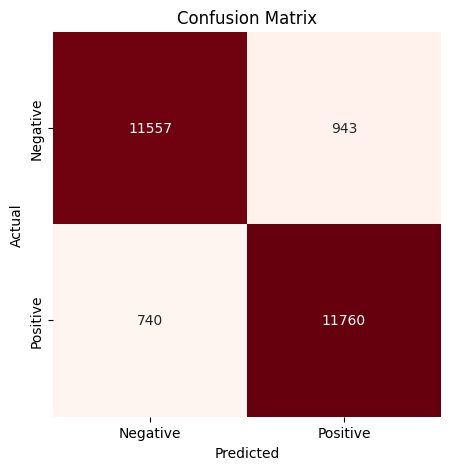

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], fmt='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [37]:
id2label = {0: 'Negative', 1: 'Positive'}
text = "I am super happy today. I got it done. Finally!!"
def get_prediction(text):
    input_encoded = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**input_encoded)
    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()
    return id2label[pred]
get_prediction(text)

'Positive'

In [41]:
trainer.save_model("bert-base-uncased-sentiment-model")


In [42]:
from transformers import pipeline
classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')
texts = [
    "I am super happy today. I got it done. Finally!!",
    "A very good day indeed",
    "We loved mth111",
    "I am feeling anxious"
]
predictions = classifier(texts)

for text, prediction in zip(texts, predictions):
    print(f"Text: {text} -> Prediction: {prediction}")

Device set to use cuda:0


Text: I am super happy today. I got it done. Finally!! -> Prediction: {'label': 'LABEL_1', 'score': 0.9954628348350525}
Text: A very good day indeed -> Prediction: {'label': 'LABEL_1', 'score': 0.9885056018829346}
Text: We loved mth111 -> Prediction: {'label': 'LABEL_1', 'score': 0.8921302556991577}
Text: I am feeling anxious -> Prediction: {'label': 'LABEL_1', 'score': 0.5388327240943909}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')